# Visualization Fundamental from Scratch with Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
sale = pd.read_csv('supermarket_sales_nan.csv')
sale.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
'''
1. print info of dataset
2. print describe of dataset
3. print unique value of Product line
4. total gross income by Product line
5. average unit price by Gender
6. total quantity by City
7. total revenue (Total) by Customer type
8. total quantity by Branch

In [6]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               967 non-null    float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
sale.describe()

In [11]:
sale['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [32]:
group = sale['gross income'].groupby(sale['Product line']).sum().reset_index()
group

,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530
5,Sports and travel,2624.8965


In [20]:
group = sale['gross income'].groupby(sale['Product line']).sum()
group

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

array([<Axes: ylabel='Unit price'>], dtype=object)

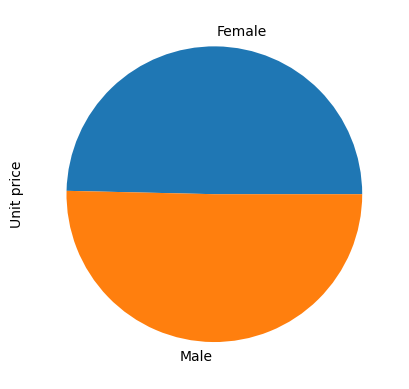

In [31]:
group2  = sale['Unit price'].groupby(sale['Gender']).mean()
group2.plot(kind = 'pie',subplots=True)

In [23]:
group3 = sale['Quantity'].groupby(sale['City']).sum()
group3

City
Mandalay     1820
Naypyitaw    1831
Yangon       1859
Name: Quantity, dtype: int64

In [24]:
group4 = sale['Total'].groupby(sale['Customer type']).sum()
group4

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [25]:
group5 = sale['Quantity'].groupby(sale['Branch']).sum()
group5

Branch
A    1859
B    1820
C    1831
Name: Quantity, dtype: int64

<Axes: ylabel='Quantity'>

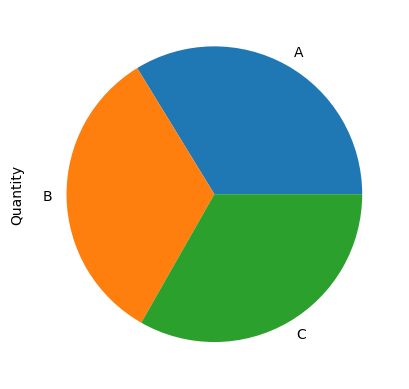

In [27]:
group5.plot(kind = 'pie')

In [ ]:
'''
Thể hiện doanh số của 3 siêu thị Aeon, BigC, Coop (A,B,C) trong 4 tuần của tháng 1
Đâu là tuần cao điểm bán hàng của các siêu thị này?
'''

## Bước 1: Chuẩn bị data đầu vào

In [4]:
# quantity by week_num, branch
sale['Date'] = sale['Date'].astype('datetime64[ns]')
sale['week_num'] = sale['Date'].dt.isocalendar().week
sale_by_period = sale.groupby(['week_num','Branch'], as_index = False)['Quantity'].sum()
sale_m1 = sale_by_period[sale_by_period['week_num'] <= 4]
sale_m1

C:\Users\Admin\AppData\Local\Temp\ipykernel_24568\2079783385.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sale['Date'] = sale['Date'].astype('datetime64[ns]')


,week_num,Branch,Quantity
0,1,A,69
1,1,B,40
2,1,C,57
3,2,A,25
4,2,B,10
5,2,C,15
6,3,A,189
7,3,B,111
8,3,C,161
9,4,A,170


In [5]:
# prepare data on plot
x = sale_m1['week_num'].unique()
A = sale_m1[sale_m1['Branch']=='A']['Quantity'].unique()
B = sale_m1[sale_m1['Branch']=='B']['Quantity'].unique()
C = sale_m1[sale_m1['Branch']=='C']['Quantity'].unique()

print(x)
print(A)
print(B)
print(C)

<IntegerArray>
[1, 2, 3, 4]
Length: 4, dtype: UInt32
[ 69  25 189 170]
[ 40  10 111 144]
[ 57  15 161 175]


## Bước 2: Dựng chart đầu tiên

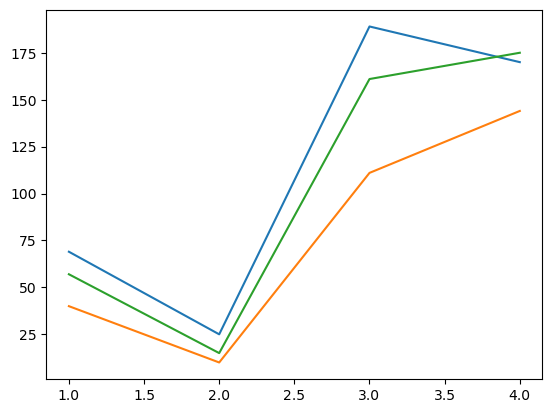

In [6]:
# first plot
plt.plot(x,A)
plt.plot(x,B)
plt.plot(x,C)

plt.show()

## Bước 3: Bổ sung tiêu đề, legend cho chart và axis

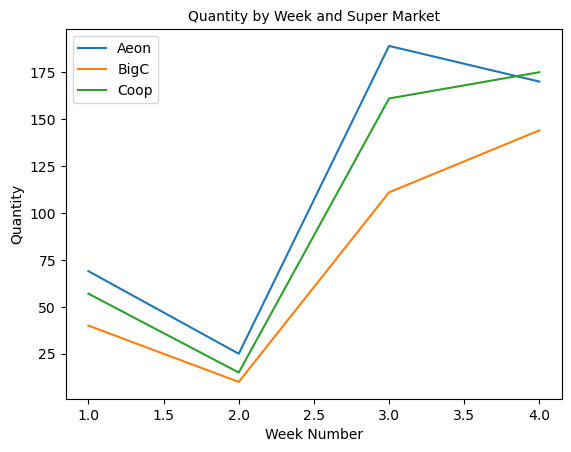

In [7]:
# Add legend, title
plt.plot(x, A, label = 'Aeon')
plt.plot(x, B, label = 'BigC')
plt.plot(x, C, label = 'Coop')

plt.title('Quantity by Week and Super Market', fontsize = 10)
plt.xlabel('Week Number', fontsize = 10)
plt.ylabel('Quantity', fontsize = 10)

plt.legend(loc = 'upper left')  # loc = location

plt.show()

## Bước 4: Điều chỉnh trục hoành

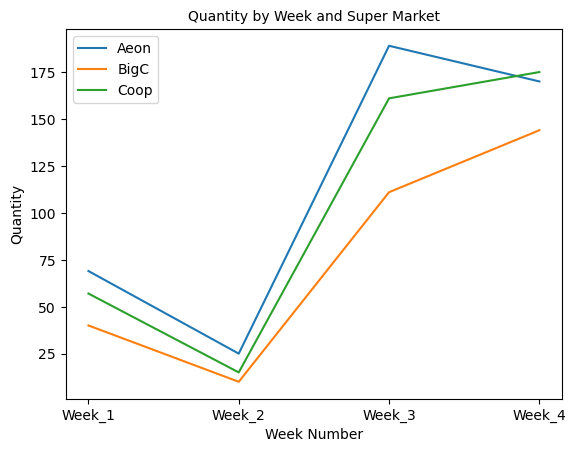

In [9]:
# Cách 1:
sale_m1_4w = sale_m1[sale_m1['week_num']<5]
x = sale_m1_4w['week_num'].unique().astype('str')
A = sale_m1_4w[sale_m1_4w['Branch']=='A']['Quantity'].unique()
B = sale_m1_4w[sale_m1_4w['Branch']=='B']['Quantity'].unique()
C = sale_m1_4w[sale_m1_4w['Branch']=='C']['Quantity'].unique()

values = ['Week_' + n for n in x]

plt.plot(x, A, label = 'Aeon')
plt.plot(x, B, label = 'BigC')
plt.plot(x, C, label = 'Coop')

plt.title('Quantity by Week and Super Market', fontsize = 10)
plt.xlabel('Week Number', fontsize = 10)
plt.ylabel('Quantity', fontsize = 10)

plt.legend(loc = 'upper left')  # loc = location

plt.xticks(x,values)  # tickcs là mỗi chỗ đánh dấu nhỏ nhỏ trên trục

plt.show()

## Bước 5: Add data labels, text

In [10]:
def addlabel(xs, ys):
    for x,y in zip(xs,ys):
        label = '{:.0f}'.format(y)
        plt.annotate(
            label,  # this is the text           
            xy = (x,y),  # these are the coordinates to position the label
            xytext = (x,y-2),
            ha = 'center'
        )

In [20]:
def addtext(x,y,text):
    plt.annotate(
        text,
        xy = (x,y),  # this is the text 
        xytext = (x,y-2),  # these are the coordinates to position the label
        color = 'red',
        arrowprops = dict(facecolor = 'black', headwidth = 4, width = 2, headlength = 4)
    )

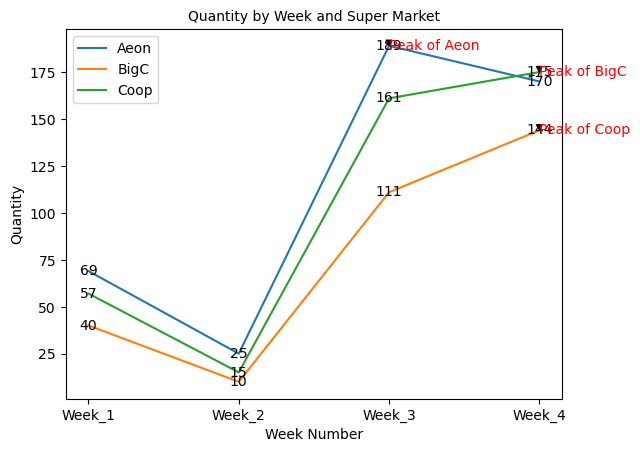

In [21]:
# Add text & labels

sale_m1_4w = sale_m1[sale_m1['week_num'] < 5]
x = sale_m1_4w['week_num'].unique().astype('str')
A = sale_m1_4w[sale_m1_4w['Branch']=='A']['Quantity'].unique()
B = sale_m1_4w[sale_m1_4w['Branch']=='B']['Quantity'].unique()
C = sale_m1_4w[sale_m1_4w['Branch']=='C']['Quantity'].unique()

values = ['Week_' + n for n in x]

plt.plot(x, A, label = 'Aeon')
plt.plot(x, B, label = 'BigC')
plt.plot(x, C, label = 'Coop')

plt.title('Quantity by Week and Super Market', fontsize = 10)
plt.xlabel('Week Number', fontsize = 10)
plt.ylabel('Quantity', fontsize = 10)

plt.legend(loc = 'upper left')  # loc = location

plt.xticks(x,values)  # tickcs là mỗi chỗ đánh dấu nhỏ nhỏ trên trục

addlabel(x,A)
addlabel(x,B)
addlabel(x,C)

addtext(2,189, 'Peak of Aeon')
addtext(3,175, 'Peak of BigC')
addtext(3,144, 'Peak of Coop')

plt.show()

## Bước 6: Điều chỉnh kích thước và hoàn thiện chart

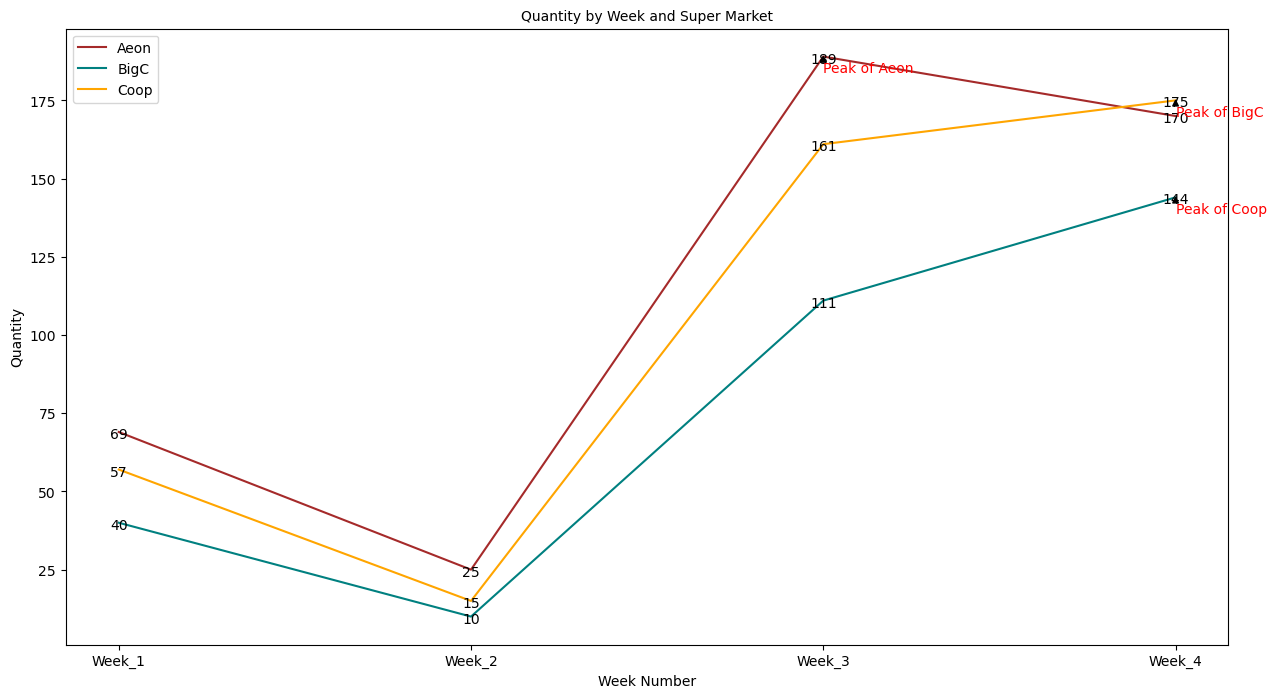

In [13]:
# prepare data
sale_m1_4w = sale_m1[sale_m1['week_num'] < 5]
x = sale_m1_4w['week_num'].unique().astype('str')
A = sale_m1_4w[sale_m1_4w['Branch']=='A']['Quantity'].unique()
B = sale_m1_4w[sale_m1_4w['Branch']=='B']['Quantity'].unique()
C = sale_m1_4w[sale_m1_4w['Branch']=='C']['Quantity'].unique()

# set size
plt.figure(figsize = (15,8))

# plot
plt.plot(x, A, label = 'Aeon', c = 'brown')
plt.plot(x, B, label = 'BigC', c ='teal')
plt.plot(x, C, label = 'Coop', c = 'orange')

# decorate
plt.title('Quantity by Week and Super Market', fontsize = 10)
plt.xlabel('Week Number', fontsize = 10)
plt.ylabel('Quantity', fontsize = 10)

plt.legend(loc = 'upper left')  # loc = location

values = ['Week_' + n for n in x]
plt.xticks(x,values)  # tickcs là mỗi chỗ đánh dấu nhỏ nhỏ trên trục

addlabel(x,A)
addlabel(x,B)
addlabel(x,C)

addtext(2,189, 'Peak of Aeon')
addtext(3,175, 'Peak of BigC')
addtext(3,144, 'Peak of Coop')

plt.show()


# Combine Seaborn & Matplotlib
Sử dụng Seaborn cho đơn giản các bước, vì đã tích hợp nhiều parameters chỉ cần điền vào

Muốn custom nhiều hơn, kết hợp matplotlib

In [15]:
import seaborn as sns

In [23]:
sale_m1_4w['week_num'] = sale_m1_4w['week_num'].astype(str)

C:\Users\Admin\Annaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\Annaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


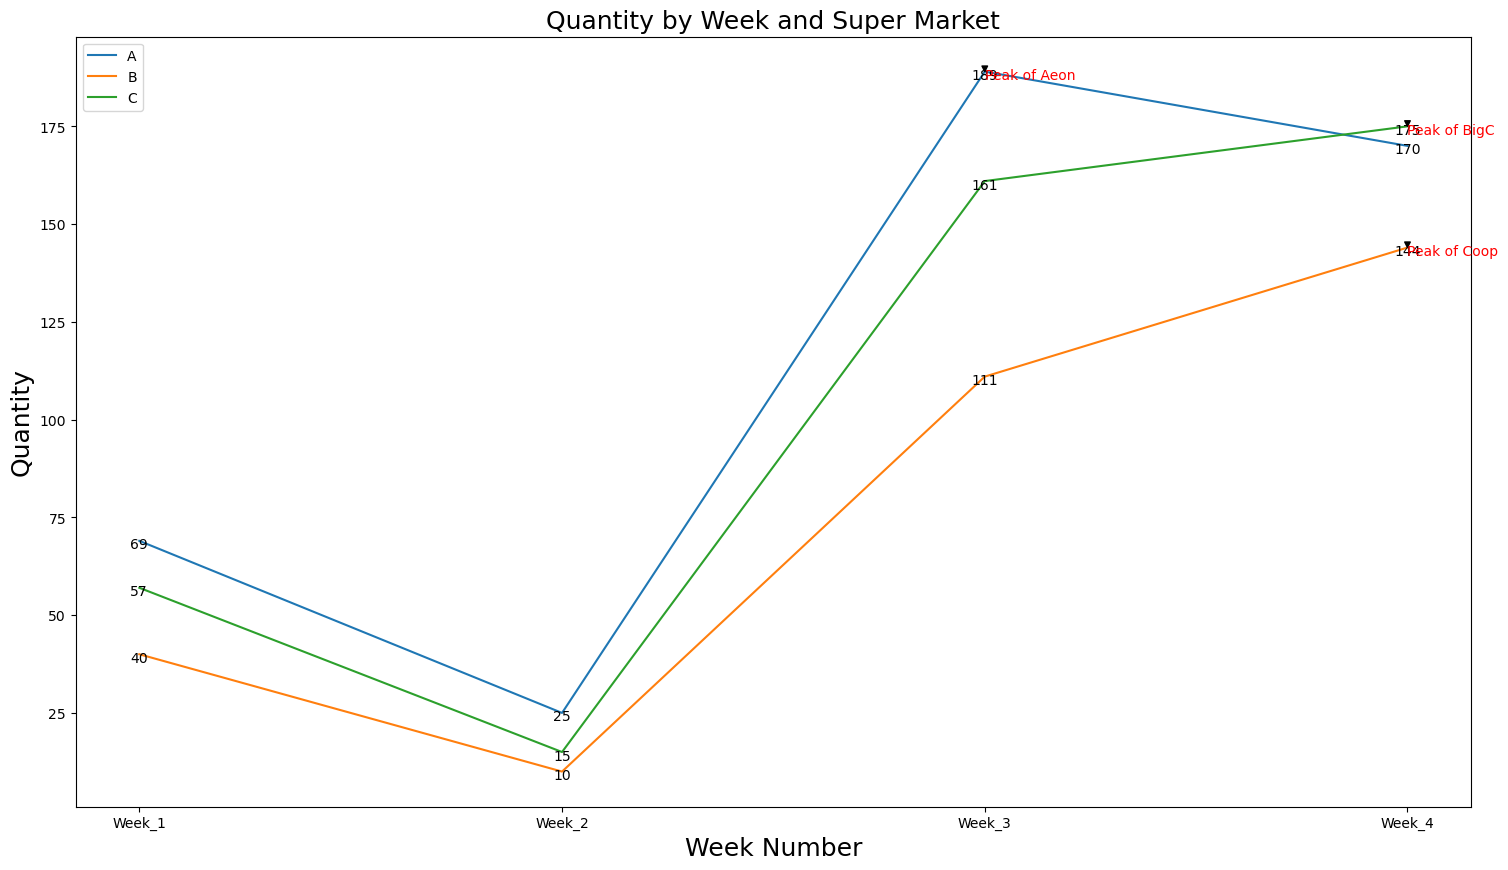

In [24]:
# Set size
plt.figure(figsize = (18,10))

# Plot 
sns.lineplot(data = sale_m1_4w, x = 'week_num', y = 'Quantity', hue = 'Branch')

# Decorate
plt.title('Quantity by Week and Super Market', fontsize = 18)
plt.xlabel('Week Number', fontsize = 18)
plt.ylabel('Quantity', fontsize = 18)
plt.legend(loc = 'upper left')

values = ['Week_' + n for n in x]
plt.xticks(x, values)

addlabel(x,A)
addlabel(x,B)
addlabel(x,C)

addtext(2,189, 'Peak of Aeon')
addtext(3,175, 'Peak of BigC')
addtext(3,144, 'Peak of Coop')

plt.show()